In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Piplines import Models, inverses, preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso


data = {
    "model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "r2_score_train": [],
    "r2_score_test": [],
    "max_dif": [],
}

all_used_models = pd.DataFrame(data)

train = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/train.csv",
)
test = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/test.csv"
)
train.drop(columns="Unnamed: 0", inplace=True)
test.drop(columns="Unnamed: 0", inplace=True)

In [2]:
x_train, x_test, y_train, y_test = train_test_split(
    train.drop("SalePrice", axis=1),
    train["SalePrice"],
    test_size=0.2,
    random_state=101,
)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Linear Regression


In [3]:
scaled_linear_model = Models.Linear_Scaled_model(x_train, y_train)

### scaled linear model


In [4]:
scaled_linear_model

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', LinearRegression())])

In [5]:
x_train_preproc, y_train_preproc = preprocess.scaled_linear_model(X=x_train, Y=y_train)

x_test_preproc, y_test_preproc = preprocess.scaled_linear_model(X=x_test, Y=y_test)


train_prediction = scaled_linear_model.predict(x_train_preproc)
test_prediction = scaled_linear_model.predict(x_test_preproc)

In [6]:
print(
    "Score Of Training Data = ",
    scaled_linear_model.score(x_train_preproc, y_train_preproc) * 100,
    "%",
)

print(
    "Score Of Testing Data = ",
    scaled_linear_model.score(x_test_preproc, y_test_preproc) * 100,
    "%",
)

Score Of Training Data =  82.90902243760117 %
Score Of Testing Data =  84.92568819249307 %


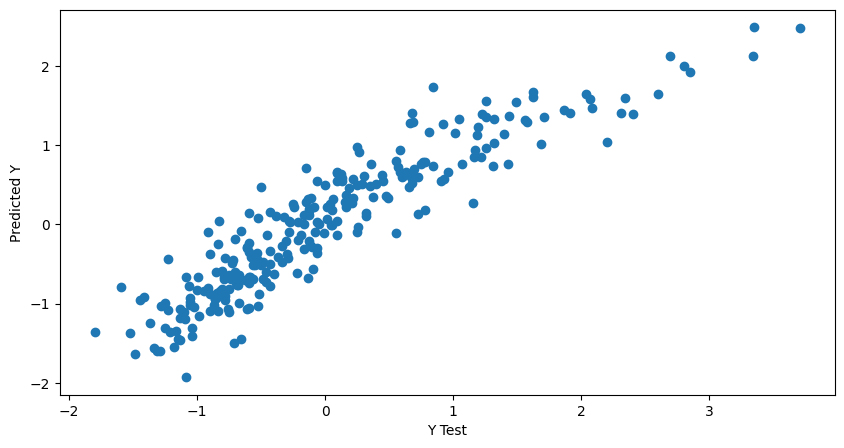

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

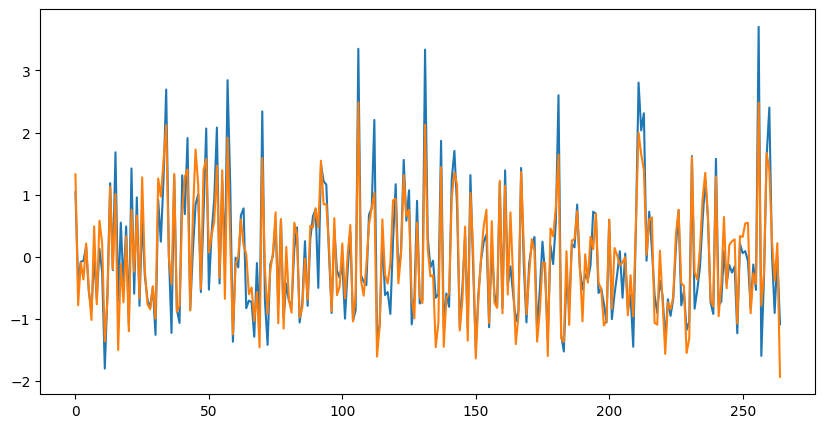

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [9]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("Score", r2_score(y_test_preproc, test_prediction) * 100)

MAE: 0.2929199256430689
MSE: 0.15074311807506927
RMSE: 0.3882565106666845
Score 84.92568819249307


In [10]:
inversed_prediction_scaled_linear_model = inverses.inverse_scaled_linear_model(
    test_prediction, y_test
)
max_dif = 0
for i in range(len(inversed_prediction_scaled_linear_model)):
    inversed_prediction_scaled_linear_model[i][0] = int(
        inversed_prediction_scaled_linear_model[i][0]
    )

    max_dif = max(
        max_dif, abs(inversed_prediction_scaled_linear_model[i][0] - y_test[i][0])
    )
max_dif

79764.0

In [11]:
data = {
    "model": "scaled linear model",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "r2_score_train": r2_score(y_train_preproc, train_prediction) * 100,
    "r2_score_test": r2_score(y_test_preproc, test_prediction) * 100,
    "max_dif": max_dif,
}

all_used_models.loc[len(all_used_models)] = data
all_used_models

,model,MAE,MSE,RMSE,r2_score_train,r2_score_test,max_dif
0,scaled linear model,0.29292,0.150743,0.388257,82.909022,84.925688,79764.0


# linear model Scaled_log data


In [12]:
linear_scaled_loged_model = Models.Linear_Scaled_loged_model(x_train, y_train)

In [13]:
linear_scaled_loged_model

Pipeline(steps=[('Column Transformer For Y data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Log for y_tran',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  []),
                                                 ('scaling for y_tran',
                                                  StandardScaler(), [])])),
                ('Standard Scaler For x data', StandardScaler()),
                ('Linear Regression ', LinearRegression())])

In [14]:
x_train_preproc, y_train_preproc = preprocess.Scaled_loged_linear_model(
    X=x_train, Y=y_train
)

x_test_preproc, y_test_preproc = preprocess.Scaled_loged_linear_model(
    X=x_test, Y=y_test
)


train_prediction = linear_scaled_loged_model.predict(x_train_preproc)
test_prediction = linear_scaled_loged_model.predict(x_test_preproc)

In [15]:
print(
    "Score Of Training Data = ",
    linear_scaled_loged_model.score(x_train_preproc, y_train_preproc) * 100,
    "%",
)

print(
    "Score Of Testing Data = ",
    linear_scaled_loged_model.score(x_test_preproc, y_test_preproc) * 100,
    "%",
)

Score Of Training Data =  85.03640005975517 %
Score Of Testing Data =  87.0661461560555 %


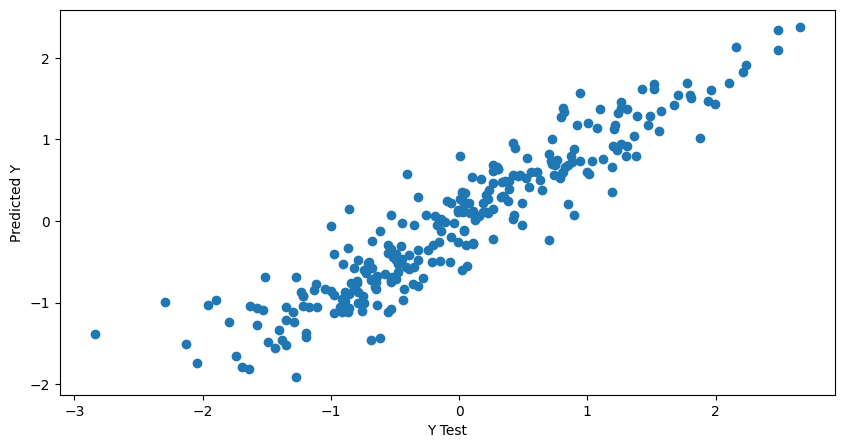

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

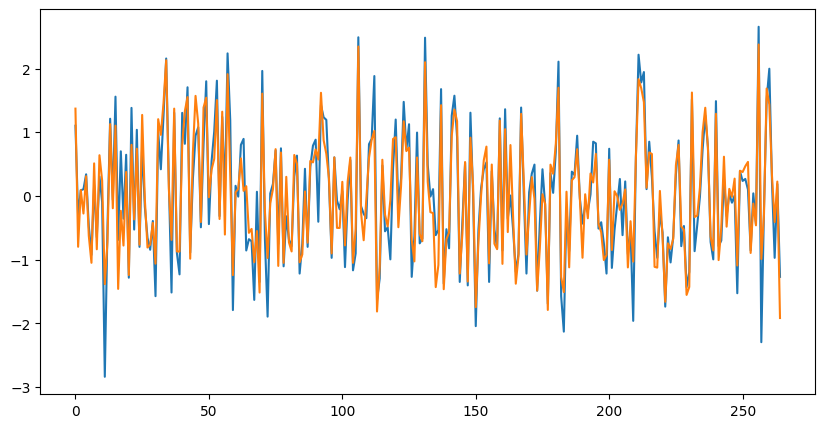

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [18]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("Score", r2_score(y_test_preproc, test_prediction) * 100)

MAE: 0.2716220330682072
MSE: 0.12933853843944512
RMSE: 0.35963667560392826
Score 87.0661461560555


In [19]:
inversed_prediction_linear_scaled_loged_model = (
    inverses.invese_Scaled_loged_linear_model(test_prediction, y_test)
)
max_dif = 0
for i in range(len(inversed_prediction_linear_scaled_loged_model)):
    inversed_prediction_linear_scaled_loged_model[i][0] = int(
        inversed_prediction_linear_scaled_loged_model[i][0]
    )
    max_dif = max(
        max_dif, abs(inversed_prediction_linear_scaled_loged_model[i][0] - y_test[i][0])
    )
max_dif

86701.0

In [20]:
data = {
    "model": "linear scaled loged model",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "r2_score_train": r2_score(y_train_preproc, train_prediction) * 100,
    "r2_score_test": r2_score(y_test_preproc, test_prediction) * 100,
    "max_dif": max_dif,
}

all_used_models.loc[len(all_used_models)] = data
all_used_models

,model,MAE,MSE,RMSE,r2_score_train,r2_score_test,max_dif
0,scaled linear model,0.292920,0.150743,0.388257,82.909022,84.925688,79764.0
1,linear scaled loged model,0.271622,0.129339,0.359637,85.036400,87.066146,86701.0


# Regularization Models

### Lasso & Ridge


### Ridge


In [21]:
ridge = Models.Ridge_model(x_train, y_train)

when alpha =  0 score =  0.8290902243760117
when alpha =  0.1 score =  0.8290902180455388
when alpha =  3.5 score =  0.8290826974990668
when alpha =  5.5 score =  0.8290719546428679
when alpha =  8.4 score =  0.8290486408879677
when alpha =  9 score =  0.8290427266980493
when alpha =  10.5 score =  0.8290263732540522


In [22]:
ridge

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', Ridge(alpha=0))])

In [23]:
x_train_preproc, y_train_preproc = preprocess.scaled_linear_model(X=x_train, Y=y_train)

x_test_preproc, y_test_preproc = preprocess.scaled_linear_model(X=x_test, Y=y_test)


train_prediction = ridge.predict(x_train_preproc)
test_prediction = ridge.predict(x_test_preproc)
print(
    "Score Of Training Data = ",
    ridge.score(x_train_preproc, y_train_preproc) * 100,
    "%",
)

print(
    "Score Of Testing Data = ",
    ridge.score(x_test_preproc, y_test_preproc) * 100,
    "%",
)

Score Of Training Data =  82.90902243760117 %
Score Of Testing Data =  84.92568819249307 %


### best alpha is 0, that means that there is no different betwenn it and linear regression, so i will skip it


# Lasso


In [24]:
lasso = Models.Lasso_model(x_train, y_train)

when alpha =  0.0001 score =  0.8290898959363554
when alpha =  0.0002 score =  0.829088910175696
when alpha =  0.0003 score =  0.82908725617861
when alpha =  0.0004 score =  0.8290849216183171
when alpha =  0.0005 score =  0.829083106283062
when alpha =  0.0006 score =  0.8290811344731649
when alpha =  0.0007 score =  0.8290788185291823
when alpha =  0.0008 score =  0.829076187071777


## Bad result from Lasso model, skiiiip


## log scaled to lasso and ridge


In [25]:
ridge_log_scaled = Models.Ridge_model_log_scaled(x_train, y_train)

0.8503640005975517
0.8503640005388486
0.8503588702643534
0.8503500218313033
0.850310651458942
0.8502885722703395
0.8502492825912575
0.85020311587088
0.8501687880457062


In [26]:
ridge_log_scaled

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', Ridge(alpha=0))])

### alpha is 0, nothing changed


# Elastic-Net


In [27]:
elastic_net = Models.Elastic_Net_model(x_train, y_train)

when alpha =  0 and lambda =  0 score =  0.8290902243760117
when alpha =  0 and lambda =  0.05 score =  0.8290902243760117
when alpha =  0 and lambda =  0.02 score =  0.8290902243760117
when alpha =  0 and lambda =  0.03 score =  0.8290902243760117
when alpha =  0 and lambda =  0.04 score =  0.8290902243760117
when alpha =  0.52 and lambda =  0 score =  0.8016054873978049
when alpha =  0.52 and lambda =  0.05 score =  0.7963544988968307


/home/ahmed/.local/lib/python3.10/site-packages/sklearn/base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.033e+01, tolerance: 1.057e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

when alpha =  0.52 and lambda =  0.02 score =  0.7997880041665084
when alpha =  0.52 and lambda =  0.03 score =  0.7987384963538704
when alpha =  0.52 and lambda =  0.04 score =  0.797594267301502
when alpha =  1 and lambda =  0 score =  0.775827651869234
when alpha =  1 and lambda =  0.05 score =  0.7567727794098446
when alpha =  1 and lambda =  0.02 score =  0.7690923355183072
when alpha =  1 and lambda =  0.03 score =  0.7652848371915977
when alpha =  1 and lambda =  0.04 score =  0.7611795116299528
when alpha =  1.5 and lambda =  0 score =  0.7497103213259582
when alpha =  1.5 and lambda =  0.05 score =  0.7116942358987957
when alpha =  1.5 and lambda =  0.02 score =  0.7362368866760904
when alpha =  1.5 and lambda =  0.03 score =  0.7286421726571635
when alpha =  1.5 and lambda =  0.04 score =  0.7204642382903873


/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+02, tolerance: 1.057e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.085e+02, tolerance: 1.057e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skl

## Bad result from elastic_net model


# DecisionTreeRegressor


In [28]:
DTR = Models.DecisionTreeRegressor_Scaled_model(x_train, y_train)
DTR

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', DecisionTreeRegressor(random_state=0))])

In [29]:
x_train_preproc, y_train_preproc = preprocess.scaled_linear_model(X=x_train, Y=y_train)

x_test_preproc, y_test_preproc = preprocess.scaled_linear_model(X=x_test, Y=y_test)


train_prediction = DTR.predict(x_train_preproc)
test_prediction = DTR.predict(x_test_preproc)

In [30]:
print(
    "Score Of Training Data = ",
    DTR.score(x_train_preproc, y_train_preproc) * 100,
    "%",
)

print(
    "Score Of Testing Data = ",
    DTR.score(x_test_preproc, y_test_preproc) * 100,
    "%",
)

Score Of Training Data =  99.99774810954011 %
Score Of Testing Data =  69.86537427859336 %


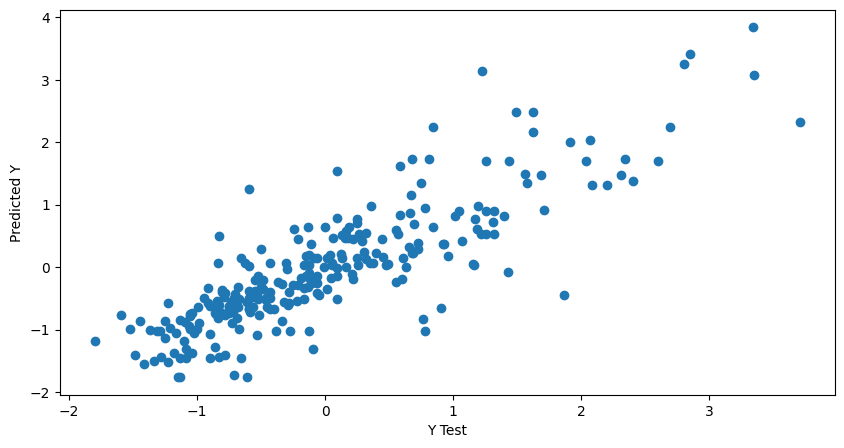

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

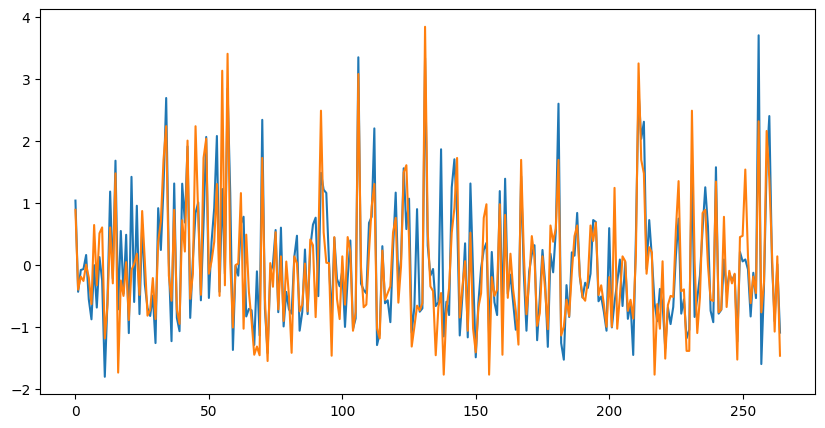

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [33]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("Score", r2_score(y_test_preproc, test_prediction) * 100)

MAE: 0.4002036243841478
MSE: 0.3013462572140664
RMSE: 0.5489501409181587
Score 69.86537427859336


In [34]:
len(test_prediction), len(y_test)

(265, 265)

In [35]:
temp = []
for i in range(len(test_prediction)):
    a = []
    a.append(test_prediction[i])
    temp.append(a)
test_prediction = temp

inversed_prediction_DTR = inverses.inverse_scaled_linear_model(test_prediction, y_test)
max_dif = 0
for i in range(len(inversed_prediction_DTR)):
    inversed_prediction_DTR[0] = int(inversed_prediction_DTR[i][0])

    max_dif = max(max_dif, abs(inversed_prediction_DTR[0] - y_test[i][0]))
max_dif = max_dif[0]
max_dif

151313.0

In [36]:
data = {
    "model": "DTR",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "r2_score_train": r2_score(y_train_preproc, train_prediction) * 100,
    "r2_score_test": r2_score(y_test_preproc, test_prediction) * 100,
    "max_dif": max_dif,
}

all_used_models.loc[len(all_used_models)] = data
all_used_models

,model,MAE,MSE,RMSE,r2_score_train,r2_score_test,max_dif
0,scaled linear model,0.292920,0.150743,0.388257,82.909022,84.925688,79764.0
1,linear scaled loged model,0.271622,0.129339,0.359637,85.036400,87.066146,86701.0
2,DTR,0.400204,0.301346,0.548950,99.997748,69.865374,151313.0


# best one is linear scaled logit model, so i will choose it and build the program based on it
